# Getting Started with Algorithmic Trading 

In this activity, students will write a trading algorithm that uses Python to represent the conditions of a simple trading strategy.

## Instructions:

1. Using the data that the starter notebook supplies, run the code cells that import the required libraries.

2. Visualize the price movement of the DataFrame by using the `hvplot` function.

3. Create a new variable called 'daily_returns' and 'daily_returns_lagged' and determine the correlation between the variables 'daily_returns' and 'daily_returns_lagged'.

4. Based on the correlation, create a trading strategy based on the previous day's returns.

4. Add a column named “trade_type” to the DataFrame that shows whether you have a 'long' or 'short' position on that day.

## Step 1: Using the data that the starter notebook supplies, run the code cells that import the required libraries, and then create a Pandas DataFrame named `fntk_df`.

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas as plot

In [8]:
# Read the vnq.csv file from the Resources folder into a Pandas DataFrame
# Set the `Date` column as the DateTimeIndex
fntk_df = pd.read_csv(
    Path("../Resources/fntk3.csv"), 
    index_col="Date",
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
fntk_df.head()

C:\Users\ppate\AppData\Local\Temp\ipykernel_15996\4260272182.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fntk_df = pd.read_csv(


,Close
Date,
2019-01-02 05:00:00+00:00,135.4100
2019-01-03 05:00:00+00:00,131.8902
2019-01-04 05:00:00+00:00,137.9400
2019-01-07 05:00:00+00:00,138.2300
2019-01-08 05:00:00+00:00,142.5843


<Axes: xlabel='Date', ylabel='Price'>

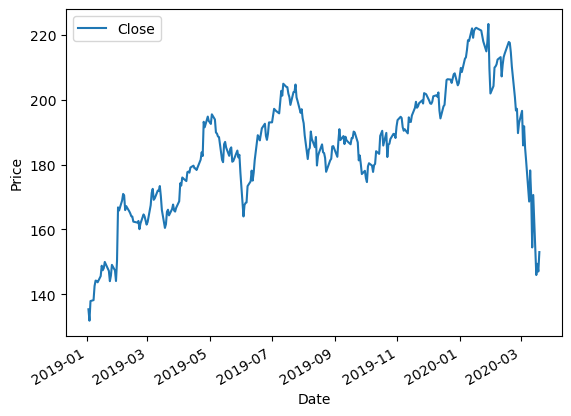

In [14]:
# Use hvplot to visualize the DataFrame
fntk_df.plot(
    ylabel = "Price",
    xlabel = "
)

In [15]:
# Create a column for "daily_returns" in fntk_df and review the dataframe
fntk_df["daily_returns"] = fntk_df["Close"].pct_change()
fntk_df

,Close,daily_returns
Date,,
2019-01-02 05:00:00+00:00,135.4100,NaN
2019-01-03 05:00:00+00:00,131.8902,-0.025994
2019-01-04 05:00:00+00:00,137.9400,0.045870
2019-01-07 05:00:00+00:00,138.2300,0.002102
2019-01-08 05:00:00+00:00,142.5843,0.031500
...,...,...
2020-03-13 04:00:00+00:00,170.6200,0.104623
2020-03-16 04:00:00+00:00,145.9600,-0.144532
2020-03-17 04:00:00+00:00,149.4200,0.023705


In [16]:
# Create a column for "daily_returns_lagged" in fntk_df and review the dataframe
fntk_df["daily_returns_lagged"] = fntk_df["daily_returns"].shift(1)
fntk_df

,Close,daily_returns,daily_returns_lagged
Date,,,
2019-01-02 05:00:00+00:00,135.4100,NaN,NaN
2019-01-03 05:00:00+00:00,131.8902,-0.025994,NaN
2019-01-04 05:00:00+00:00,137.9400,0.045870,-0.025994
2019-01-07 05:00:00+00:00,138.2300,0.002102,0.045870
2019-01-08 05:00:00+00:00,142.5843,0.031500,0.002102
...,...,...,...
2020-03-13 04:00:00+00:00,170.6200,0.104623,-0.092586
2020-03-16 04:00:00+00:00,145.9600,-0.144532,0.104623
2020-03-17 04:00:00+00:00,149.4200,0.023705,-0.144532


In [20]:
fntk_df.columns

Index(['Close', 'daily_returns', 'daily_returns_lagged'], dtype='object')

In [27]:
# Create a table that shows the correlation between 'daily_returns' and 'daily_returns_lagged'
fntk_df[['daily_returns', 'daily_returns_lagged']].corr()

,daily_returns,daily_returns_lagged
daily_returns,1.000000,-0.200505
daily_returns_lagged,-0.200505,1.000000


In [29]:
# Create a trading signal based on the lagged returns
fntk_df["trade_type"] = np.where(fntk_df["daily_returns_lagged"] < 0, 1, -1)

In [30]:
# Review the DataFrame
fntk_df

,Close,daily_returns,daily_returns_lagged,trade_type
Date,,,,
2019-01-02 05:00:00+00:00,135.4100,NaN,NaN,-1
2019-01-03 05:00:00+00:00,131.8902,-0.025994,NaN,-1
2019-01-04 05:00:00+00:00,137.9400,0.045870,-0.025994,1
2019-01-07 05:00:00+00:00,138.2300,0.002102,0.045870,-1
2019-01-08 05:00:00+00:00,142.5843,0.031500,0.002102,-1
...,...,...,...,...
2020-03-13 04:00:00+00:00,170.6200,0.104623,-0.092586,1
2020-03-16 04:00:00+00:00,145.9600,-0.144532,0.104623,-1
2020-03-17 04:00:00+00:00,149.4200,0.023705,-0.144532,1
